In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

scores=pd.read_csv(r'C:\Users\Lisa\Documents\Python\PISA project\data\scores.csv')
questions=pd.read_csv(r'C:\Users\Lisa\Documents\Python\PISA project\data\questions.csv')
questions.head()

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,EDUSHORT,STAFFSHORT,STUBEHA,TEACHBEHA,SCMCEG,W_SCHGRNRABWT,W_FSTUWT_SCH_SUM,SENWT,VER_DAT,BOOKID
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,1.2478,-1.4551,-1.1797,-2.0409,-1.0391,7.98891,115.10603,24.81933,09MAY19:11:20:57,NaN
1,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,0.6221,-1.4551,2.1196,2.5150,-1.0542,6.50492,26.01970,20.20900,09MAY19:11:20:57,NaN
2,3,8,ALB,800004,07MS,800,800,ALB0211,80000,0,...,0.4591,-1.4551,-0.6199,-0.4415,0.9042,6.64198,99.62974,20.63480,09MAY19:11:20:57,NaN
3,4,8,ALB,800005,07MS,800,800,ALB0107,80000,0,...,1.3065,1.2432,-0.2682,-0.0452,-1.5648,5.93762,66.50133,18.44654,09MAY19:11:20:57,NaN
4,5,8,ALB,800006,07MS,800,800,ALB0105,80000,0,...,-0.2376,-1.4551,-1.3196,-2.0409,0.9042,14.61508,277.68645,45.40500,09MAY19:11:20:57,NaN


In [26]:
scores.head()

,Year,Subject,Country,Score,Rank
0,2006,Maths,Albania,NaN,NaN
1,2006,Maths,Algeria,NaN,NaN
2,2006,Maths,Argentina,NaN,NaN
3,2006,Maths,Australia,520.0,12.0
4,2006,Maths,Austria,505.0,17.0


Data Cleansing

In [27]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pycountry

In [29]:
def findCountry (country_code):
    try:
        return pycountry.countries.get(alpha_3=country_code).name
    except:
        return ("not found")
    
questions['country_name'] = questions.apply(lambda row: findCountry(row.CNT) , axis = 1)

In [30]:
questions.country_name.unique()

array(['Albania', 'not found', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Belarus', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Czechia', 'Denmark', 'Dominican Republic', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hong Kong',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Jordan', 'Korea, Republic of', 'Lebanon',
       'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Malta',
       'Mexico', 'Moldova, Republic of', 'Montenegro', 'Morocco',
       'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovakia', 'Viet Nam', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'United Arab Emirates', 'Turkey',
       'Ukraine', 'North

In [31]:
scores.Country.unique()

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'China B-S-J-G', 'Belgium', 'Brazil', 'Bulgaria', 'Argentina CABA',
       'Canada', 'Chile', 'Taiwan', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'Estonia', 'Finland', 'France', 'Macedonia', 'Georgia', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
       'South Korea', 'Kosovo', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Macau', 'Malaysia', 'Malta', 'Mexico', 'Moldova',
       'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Vietnam', 'China 

In [32]:
country_dict={'Argentina':'Argentina CABA','Czech Republic':'Czechia','Moldova':'Moldova, Republic of','South Korea':'Korea, Republic of','Russia':'Russian Federation','Vietnam':'Viet Nam','China B-S-J-G':'China','China (B-S-J-Z)':'China','Macau(China)':'China','Hong Kong (China)':'Hong Kong','Macau (China)':'China'}
scores2=scores.replace({"Country": country_dict})
scores2['Country'].unique()

array(['Albania', 'Algeria', 'Argentina CABA', 'Australia', 'Austria',
       'China', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Taiwan', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominican Republic', 'Estonia', 'Finland', 'France',
       'Macedonia', 'Georgia', 'Germany', 'Greece', 'Hong Kong',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kazakhstan', 'Korea, Republic of', 'Kosovo',
       'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macau',
       'Malaysia', 'Malta', 'Mexico', 'Moldova, Republic of',
       'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation',
       'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Viet Nam', 'B

In [33]:
scores_2018=scores2[scores2.Year==2018]

In [34]:
df=pd.merge(questions,scores_2018,left_on='country_name',right_on='Country',how='inner')

In [35]:
print(scores_2018.Country.nunique())
print(questions.country_name.nunique())
print(df.Country.nunique())

78
75
71


In [36]:
df_scores=df.pivot_table(values='Score',index='Country',columns='Subject')

In [37]:
pisa=pd.merge(df,df_scores,on='Country',how='inner')

In [38]:
pisa['SR_diff']=pisa['Science']-pisa['Reading']
pisa['S_RM_diff']=pisa['Science']*2-(pisa['Reading']+pisa['Maths'])
pisa.head()

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,Year,Subject,Country,Score,Rank,Maths,Reading,Science,SR_diff,S_RM_diff
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,2018,Maths,Albania,437.0,49.0,437.0,405.0,417.0,12.0,-8.0
1,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,2018,Science,Albania,417.0,60.0,437.0,405.0,417.0,12.0,-8.0
2,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,2018,Reading,Albania,405.0,62.0,437.0,405.0,417.0,12.0,-8.0
3,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,2018,Maths,Albania,437.0,49.0,437.0,405.0,417.0,12.0,-8.0
4,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,2018,Science,Albania,417.0,60.0,437.0,405.0,417.0,12.0,-8.0


Analysis:
What variables from the PISA questionnaire have the highest correlations with PISA international science scores for 2018?

In [39]:
correlation=pisa.corr()
correlation_science=correlation[['Science']]
neg_correlations=correlation_science.sort_values(by='Science')
print(neg_correlations.head(10))

             Science
Rank       -0.968581
SC064Q03TA -0.407758
SC052Q01NA -0.257289
SC064Q04NA -0.247571
STRATIO    -0.242543
SC165Q06HA -0.234156
SC003Q01TA -0.229422
CLSIZE     -0.229422
SC052Q02NA -0.203783
SC150Q01IA -0.197697


In [40]:
pos_correlations=correlation_science.sort_values(by='Science',ascending=False)
print(pos_correlations.head(11))

             Science
Science     1.000000
Score       0.979574
Reading     0.978778
Maths       0.962885
OECD        0.717818
RATCMP2     0.380085
SC004Q06NA  0.348490
SC004Q07NA  0.309529
SC004Q03TA  0.300707
SC004Q02TA  0.266802
SC048Q02NA  0.264930


Text(0, 0.5, 'R value')

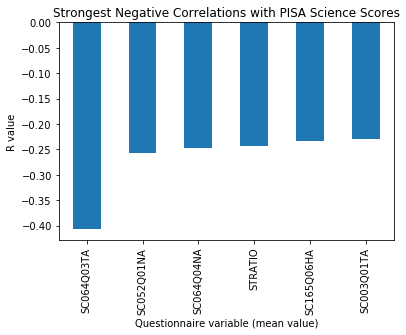

In [41]:
neg_correlations['Science'][1:7].plot(kind='bar')
plt.title('Strongest Negative Correlations with PISA Science Scores')
plt.xlabel('Questionnaire variable (mean value)')
plt.ylabel('R value')

Text(0, 0.5, 'R value')

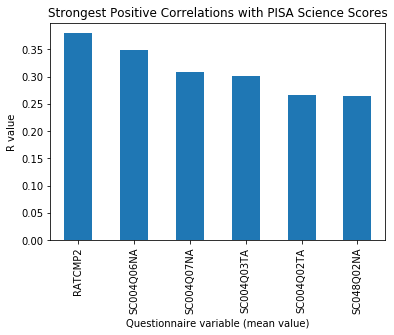

In [42]:
pos_correlations['Science'][5:11].plot(kind='bar')
plt.title('Strongest Positive Correlations with PISA Science Scores')
plt.xlabel('Questionnaire variable (mean value)')
plt.ylabel('R value')

Description of variables that have the highest correlations:  
SC064Q03TA -0.407758: During the last academic year what proportion of students' parents participated in local school government?  
RATCMP2     0.380085: Proportion of available computers that are connected to the Internet       
SC004Q06NA  0.348490: Approximately how many data projectors are available in the school altogether?   
SC004Q03TA  0.300707: Approximately how many computers for students are connected to the Internet?  
SC048Q02NA  0.264930: Percentage of students in your school with special needs  

In [43]:
pisa_cleaned1=pisa.dropna(subset=['SC064Q03TA','RATCMP2','SC004Q06NA','SC004Q03TA','SC048Q02NA','Science'])

In [44]:
multi_colinn_check=pisa_cleaned1[['SC064Q03TA', 'RATCMP2', 'SC004Q06NA', 'SC004Q03TA', 'SC048Q02NA', 'SC004Q07NA', 'SC004Q02TA']]
multi_colinn_check.corr()

,SC064Q03TA,RATCMP2,SC004Q06NA,SC004Q03TA,SC048Q02NA,SC004Q07NA,SC004Q02TA
SC064Q03TA,1.000000,-0.206311,-0.205482,-0.164512,-0.146041,-0.149458,-0.138310
RATCMP2,-0.206311,1.000000,0.203782,0.201778,0.130443,0.182696,0.102098
SC004Q06NA,-0.205482,0.203782,1.000000,0.513251,0.116965,0.543262,0.496187
SC004Q03TA,-0.164512,0.201778,0.513251,1.000000,0.118805,0.548757,0.981925
SC048Q02NA,-0.146041,0.130443,0.116965,0.118805,1.000000,0.102691,0.112459
SC004Q07NA,-0.149458,0.182696,0.543262,0.548757,0.102691,1.000000,0.524818
SC004Q02TA,-0.138310,0.102098,0.496187,0.981925,0.112459,0.524818,1.000000


Multicollinearity (R>.75) found between SC004Q02TA and SC004Q03TA (R value=.981), so SC004Q02TA excluded from independent variables in model.

Analysis: Multiple linear regression model using the independent variables with the highest correlations with PISA science scores 2018

In [45]:
independent_variables=pisa_cleaned1[['SC064Q03TA','RATCMP2','SC004Q06NA','SC004Q03TA','SC048Q02NA']]
dependent_variable=pisa_cleaned1['Science']
dependent_variable=dependent_variable.to_frame()
independent_variables=sm.add_constant(independent_variables)
regression_model_science=sm.OLS(dependent_variable,independent_variables).fit()
print(regression_model_science.summary())

                            OLS Regression Results                            
Dep. Variable:                Science   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     4471.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:02:41   Log-Likelihood:            -2.0536e+05
No. Observations:               40690   AIC:                         4.107e+05
Df Residuals:                   40684   BIC:                         4.108e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        414.7062      0.767    540.879      0.0

In [46]:
pisa_cleaned1.to_csv(r"C:\Users\Lisa\desktop\pisa.csv")


                   Analysis below this point not to be used as part of project
                  


In [47]:
neg_SR_diff_correlation=correlation['SR_diff'].sort_values()
pos_SR_diff_correlation=correlation['SR_diff'].sort_values(ascending=False)
neg_S_RM_diff_correlation=correlation['S_RM_diff'].sort_values()
pos_S_RM_diff_correlation=correlation['S_RM_diff'].sort_values(ascending=False)
print(neg_S_RM_diff_correlation.head(10))
print(pos_S_RM_diff_correlation.head(10))

Maths          -0.324185
PROAT5AM       -0.233428
Reading        -0.231720
Score          -0.224483
SC053D11TA     -0.187382
OECD           -0.185184
SC018Q06NA01   -0.182229
SC037Q08TA     -0.127994
SC042Q01TA     -0.126967
SC158Q09HA     -0.124921
Name: S_RM_diff, dtype: float64
S_RM_diff           1.000000
SR_diff             0.605032
W_FSTUWT_SCH_SUM    0.318068
SC003Q01TA          0.298572
CLSIZE              0.298572
PROAT5AB            0.225380
STRATIO             0.216770
W_SCHGRNRABWT       0.202794
Rank                0.196199
SC004Q01TA          0.190054
Name: S_RM_diff, dtype: float64


Text(0, 0.5, 'R value')

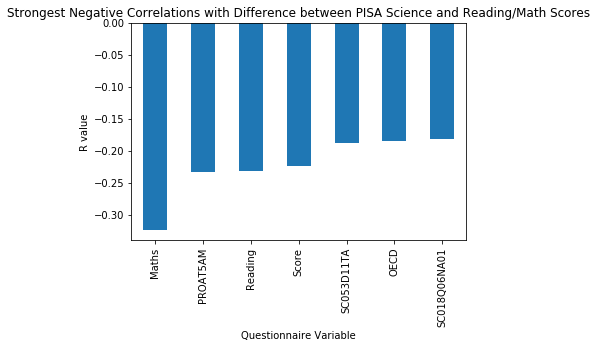

In [48]:
neg_S_RM_diff_correlation[0:7].plot(kind='bar')
plt.title('Strongest Negative Correlations with Difference between PISA Science and Reading/Math Scores')
plt.xlabel('Questionnaire Variable')
plt.ylabel('R value')

Text(0, 0.5, 'R Value')

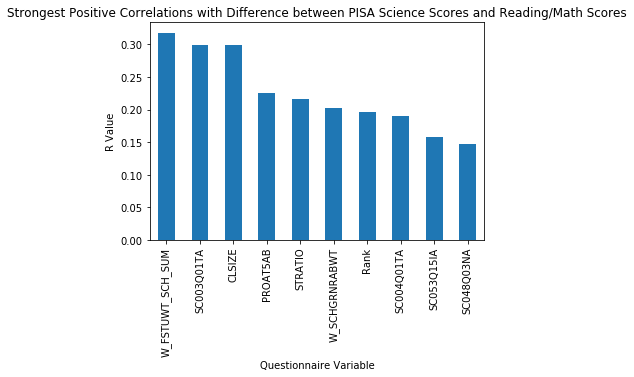

In [49]:
pos_S_RM_diff_correlation[2:12].plot(kind='bar')
plt.title('Strongest Positive Correlations with Difference between PISA Science Scores and Reading/Math Scores')
plt.xlabel('Questionnaire Variable')
plt.ylabel('R Value')

In [50]:
collin_check=pisa[['CLSIZE','SC003Q01TA','PROAT5AB','SC048Q03NA','STRATIO','PROAT5AM']]
collin_check.corr()

,CLSIZE,SC003Q01TA,PROAT5AB,SC048Q03NA,STRATIO,PROAT5AM
CLSIZE,1.000000,1.000000,0.225817,0.070845,0.362317,-0.178681
SC003Q01TA,1.000000,1.000000,0.225817,0.070845,0.362317,-0.178681
PROAT5AB,0.225817,0.225817,1.000000,0.128161,0.124439,-0.508648
SC048Q03NA,0.070845,0.070845,0.128161,1.000000,0.169328,-0.146196
STRATIO,0.362317,0.362317,0.124439,0.169328,1.000000,-0.136982
PROAT5AM,-0.178681,-0.178681,-0.508648,-0.146196,-0.136982,1.000000


Checking for multicollinearity (correlations between independent variables>.75), shows collinearity pair: SC158Q09HA/SC158Q12HA

Variables with R value and description

CLSIZE 0.479459: Class Size  
SC003Q01TA 0.479459: What is the average size of (test language) classes in your school?  
SC158Q09HA -0.394837: Is there any formal curriculum for the topic of causes of poverty?  
Maths -0.389535  
W_SCHGRNRABWT: GRADE NONRESPONSE ADJUSTED SCHOOL BASE WEIGHT  
STRATIO 0.387068: Student-Teacher Ratio 	  
W_FSTUWT_SCH_SUM: SUM OF W_FSTUWT(FINAL TRIMMED NONRESPONSE ADJUSTED STUDENT WEIGHT)  
SC048Q03NA 0.367093: Students from socioeconomically disadvantaged homes  
SC158Q12HA -0.352716: Is there any formal curriculum for the topic of equality between men and women in different parts of the world?  
SC004Q01TA 0.351931: At your school, what is the total number of students in (national grade for 15 year olds)?  
STAFFSHORT 0.346485: Shortage of educational staff   
SC053Q09TA -0.328027: Does your school offer art club or art activities to your students?

In [51]:
pisa_cleaned2=pisa.dropna(subset=['Maths','SC003Q01TA','CLSIZE','PROAT5AM','Reading','S_RM_diff'])
pisa_cleaned2.info()
pisa_cleaned2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45735 entries, 0 to 59171
Columns: 209 entries, Unnamed: 0 to S_RM_diff
dtypes: float64(191), int64(10), object(8)
memory usage: 73.3+ MB


,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,Year,Subject,Country,Score,Rank,Maths,Reading,Science,SR_diff,S_RM_diff
0,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,2018,Maths,Albania,437.0,49.0,437.0,405.0,417.0,12.0,-8.0
1,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,2018,Science,Albania,417.0,60.0,437.0,405.0,417.0,12.0,-8.0
2,1,8,ALB,800002,07MS,800,800,ALB0109,80000,0,...,2018,Reading,Albania,405.0,62.0,437.0,405.0,417.0,12.0,-8.0
3,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,2018,Maths,Albania,437.0,49.0,437.0,405.0,417.0,12.0,-8.0
4,2,8,ALB,800003,07MS,800,800,ALB0109,80000,0,...,2018,Science,Albania,417.0,60.0,437.0,405.0,417.0,12.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59167,21241,858,URY,85800191,07MS,85800,85800,URY0003,8580000,0,...,2018,Science,Uruguay,426.0,54.0,418.0,427.0,426.0,-1.0,7.0
59168,21241,858,URY,85800191,07MS,85800,85800,URY0003,8580000,0,...,2018,Reading,Uruguay,427.0,49.0,418.0,427.0,426.0,-1.0,7.0
59169,21242,858,URY,85800192,07MS,85800,85800,URY0001,8580000,0,...,2018,Maths,Uruguay,418.0,59.0,418.0,427.0,426.0,-1.0,7.0
59170,21242,858,URY,85800192,07MS,85800,85800,URY0001,8580000,0,...,2018,Science,Uruguay,426.0,54.0,418.0,427.0,426.0,-1.0,7.0


In [52]:
independent_variables=pisa_cleaned2[['Maths','SC003Q01TA','CLSIZE','PROAT5AM','Reading']]
dependent_variable=pisa_cleaned2['S_RM_diff']
dependent_variable=dependent_variable.to_frame()
independent_variables=sm.add_constant(independent_variables)
regression_model_science_diff=sm.OLS(dependent_variable,independent_variables).fit()
print(regression_model_science_diff.summary())

                            OLS Regression Results                            
Dep. Variable:              S_RM_diff   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2942.
Date:                Thu, 19 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:02:49   Log-Likelihood:            -1.9175e+05
No. Observations:               45735   AIC:                         3.835e+05
Df Residuals:                   45730   BIC:                         3.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7509      0.234     33.125      0.0